#### Introduction From Michael Pyrcz's Subsurface Data Analytics Demos
 Please Check Him Out on GitHub and YouTube @ GeostatsGuy

#### Multidimensional Scaling

A powerful ordination method in inferential statistics / information visualization for exploring / visualizing the similarity (conversely the difference) between individual samples from a high dimensional dataset.  

* beyond 2 or 3 features it is difficult to visualize the relationship between samples

* for 2 features we can easily visualize the relationships between samples with a scatter plot

* for 3 features we can either visualize in 3D or include color or matrix scatter plots

Multidimensional scaling projects the $m$ dimensional data to $p$ dimensions such that $p << m$.

* ideally we are able to project to $p=2$ to easily explore the relationships between the samples

While principal component analysis (PCA) operates with the covariance matrix, multidimensional scaling operates with the distance / dissimilarity matrix.

* you don't need to know the actual feature values, just the distance or dissimilarity between the samples

* as with any distance in feature space, we consider feature standardization and weighting

* we may also work with a variety of dissimilarity measures

#### Classical Multidimensional Scaling

Based on Euclidian distance between samples.

The Steps:

1. calculate the square distance matrix, $D^{(2)} = \left[ \delta_{i,j}^2 \right]$.

2. apply double centering $B = - \frac{1}{2} J D^{(2)} J$

3. solve for the Eigen Values, $\lambda_1,\ldots,\lambda_p$

4. solve for the projected coordinates, $x^{'}_1, \dots ,x^{'}_p$

\begin{equation}
X^{'} = E_m \land^{\frac{1}{2}}_m
\end{equation}

where $E_m$ is the matrix of Eigen vectors and $\land_m$ is the diagonal matrix of Eigen values. 

General comments about classical multidimensional scaling:

* nonlinear dimensionality reduction

* no distribution assumption

* the transform may not be unique, and may be arbitrarily be translated, rotated and transformed (these do not change the pairwise distances $||x_i - x_j||$.

#### Metric Multidimensional Scaling

A generalization of classical multidimensional scaling with a variety of metrics and a loss function optimization.

* formulated as an optimization problem to minimize the squate difference between the original and projected pairwise distances

\begin{equation}
min_{x_1,\ldots,x_m} \sum_{i<j} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.

General comments about metric multidimensional scaling:

* dissimilarity measure must be meaningful

* dimensionality reduction is performed such that the error in the sample pairwise distance is minimized

* there is a variant known as Nonmetric Multidimensional Scaling for ordinal features (categorical with ordering).

#### Checking Multidimensional Scaling Results

The multidimensional scaling approach minimizes the square difference of the pairwise distances between all of the data samples and eachother between the projected, lower dimensional, and original feature space.

* **stress** is defined as:

\begin{equation}
Stress_P(x_1,\ldots,x_n) = \left( \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2 \right)^{\frac{1}{2}}
\end{equation}

* it is also useful to visualize the scatterplot of projected vs. original pairwise distances

#### Comparison with Principal Component Analysis

Principal component analysis takes the covariance matrix ($m \times m$) between all the features and finds the orthogonal rotation such that the **variance is maximized** over the ordered principle components.  

Multidimensional scaling takes the matrix of the pairwise distances ($n \times n$) between all the samples in feature space and finds the nonlinear projects such that the **error in the pairwise distances is minimized**.


In [277]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import scipy.signal as signal             # kernel for moving window calculation
import random                             # for random numbers
import seaborn as sns                     # for matrix scatter plots

from sklearn.metrics.pairwise import euclidean_distances

In [278]:
df = pd.read_csv(r"C:/Users/culle/Documents/Data/LAICPMS_Data/Paleocene_DZ_Pairwise_KS.csv")
df[:]

,Label,n,Tornillo,paleo-Rio Grande,La Popa,San Juan,San Juan early Eocene,Raton,Uinta-Piceance,paleo-Colorado
0,Tornillo,745,0.000000,0.127845,0.052026,0.407982,0.611445,0.693410,0.307154,0.452497
1,paleo-Rio Grande,866,0.127845,0.000000,0.153701,0.311272,0.507543,0.585934,0.232507,0.332879
2,La Popa,191,0.052026,0.153701,0.000000,0.421987,0.624763,0.701379,0.330240,0.478711
3,San Juan,452,0.407982,0.311272,0.421987,0.000000,0.241103,0.329470,0.222204,0.172073
4,San Juan early Eocene,188,0.611445,0.507543,0.624763,0.241103,0.000000,0.166049,0.418146,0.198199
5,Raton,654,0.693410,0.585934,0.701379,0.329470,0.166049,0.000000,0.506326,0.329708
6,Uinta-Piceance,211,0.307154,0.232507,0.330240,0.222204,0.418146,0.506326,0.000000,0.296456
7,paleo-Colorado,1148,0.452497,0.332879,0.478711,0.172073,0.198199,0.329708,0.296456,0.000000


In [67]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, dissimilarity='precomputed', metric=False, random_state=1)
MDS_transformed = embedding.fit_transform(df[['Tornillo','paleo-Rio Grande','La Popa','San Juan','San Juan early Eocene','Raton','Uinta-Piceance','paleo-Colorado']])
MDS_transformed.shape

(8, 2)

In [68]:
df['MDS1'] = MDS_transformed[:,0]
df['MDS2'] = MDS_transformed[:,1]
df.head()

,Label,n,Tornillo,paleo-Rio Grande,La Popa,San Juan,San Juan early Eocene,Raton,Uinta-Piceance,paleo-Colorado,MDS1,MDS2
0,Tornillo,745,0.000000,0.127845,0.052026,0.407982,0.611445,0.693410,0.307154,0.452497,-0.437715,-0.293331
1,paleo-Rio Grande,866,0.127845,0.000000,0.153701,0.311272,0.507543,0.585934,0.232507,0.332879,-0.335557,-0.123414
2,La Popa,191,0.052026,0.153701,0.000000,0.421987,0.624763,0.701379,0.330240,0.478711,-0.382989,-0.489749
3,San Juan,452,0.407982,0.311272,0.421987,0.000000,0.241103,0.329470,0.222204,0.172073,0.158994,-0.054382
4,San Juan early Eocene,188,0.611445,0.507543,0.624763,0.241103,0.000000,0.166049,0.418146,0.198199,0.379079,0.327553


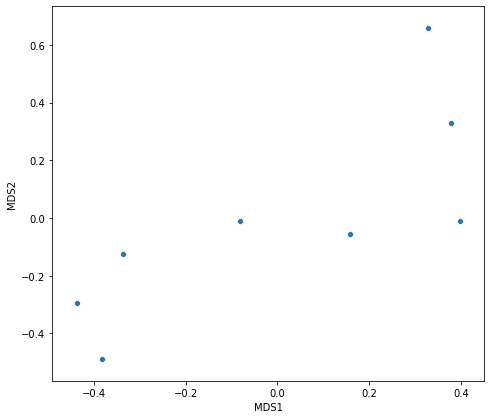

In [69]:
pairplot = sns.scatterplot(x = df['MDS1'],y = df['MDS2'],markers='o')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=1.3, wspace=0.3, hspace=0.2)
plt.show()

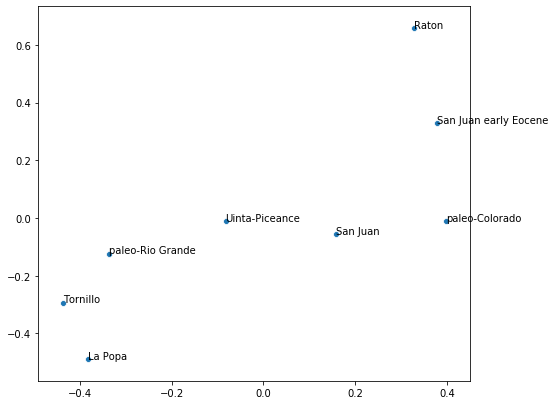

In [70]:
pairplot = sns.scatterplot(x = MDS_transformed[:,0],y = MDS_transformed[:,1],markers='o')
for i, txt in enumerate(df['Label']):
    pairplot.annotate(txt, (MDS_transformed[i,0], MDS_transformed[i,1]))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=1.3, wspace=0.3, hspace=0.2)
plt.show()

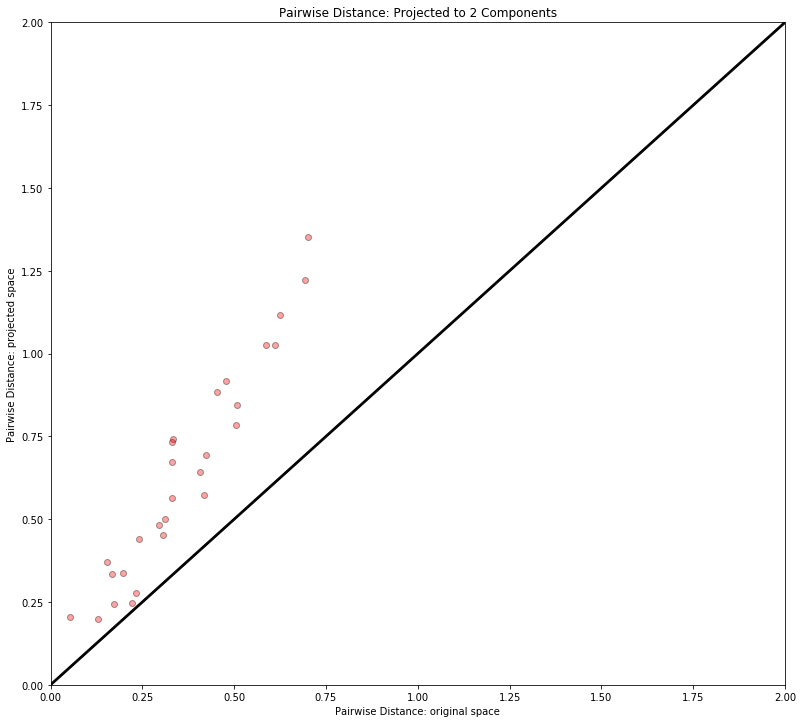

In [71]:
n_components = 2
dists = df[['Tornillo','paleo-Rio Grande','La Popa','San Juan','San Juan early Eocene','Raton','Uinta-Piceance','paleo-Colorado']].to_numpy().ravel()
#dists = euclidean_distances(df[['Tornillo','paleo-Rio Grande','La Popa','San Juan','San Juan early Eocene','Raton','Uinta-Piceance','paleo-Colorado']], squared=False).ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]
projected_dists = euclidean_distances(MDS_transformed, squared=False).ravel()[nonzero]

plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.005,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,2); plt.ylim(0,2)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()

In [287]:
matrix = df[['Tornillo','paleo-Rio Grande','La Popa','San Juan','San Juan early Eocene','Raton','Uinta-Piceance','paleo-Colorado']]
matrix

,Tornillo,paleo-Rio Grande,La Popa,San Juan,San Juan early Eocene,Raton,Uinta-Piceance,paleo-Colorado
0,0.000000,0.127845,0.052026,0.407982,0.611445,0.693410,0.307154,0.452497
1,0.127845,0.000000,0.153701,0.311272,0.507543,0.585934,0.232507,0.332879
2,0.052026,0.153701,0.000000,0.421987,0.624763,0.701379,0.330240,0.478711
3,0.407982,0.311272,0.421987,0.000000,0.241103,0.329470,0.222204,0.172073
4,0.611445,0.507543,0.624763,0.241103,0.000000,0.166049,0.418146,0.198199
5,0.693410,0.585934,0.701379,0.329470,0.166049,0.000000,0.506326,0.329708
6,0.307154,0.232507,0.330240,0.222204,0.418146,0.506326,0.000000,0.296456
7,0.452497,0.332879,0.478711,0.172073,0.198199,0.329708,0.296456,0.000000


In [288]:
from sklearn import manifold

#Creating the Metric MDS array
mds = manifold.MDS(metric=True, dissimilarity='precomputed', random_state=1)
pos = mds.fit(matrix).embedding_
Stress = mds.fit(matrix).stress_

#Creating the NonMetric MDS array
nmds = manifold.MDS(metric=False, dissimilarity='precomputed', random_state=1, n_init=1) #use n_init=1 and init=pos to replicate Glenn's
npos = nmds.fit_transform(matrix, init=pos)
nStress = nmds.fit(matrix).stress_

#Rescaling the NMDS array
snpos = nmds.fit_transform(matrix, init=pos)
snpos *= np.sqrt((pos ** 2).sum()) / np.sqrt((npos ** 2).sum())

#pos
#npos
snpos
#Stress
#nStress

array([[-0.31302068,  0.03168847],
       [-0.20359616, -0.02465929],
       [-0.33050562, -0.04096823],
       [ 0.07535161, -0.06834304],
       [ 0.28836995, -0.08191282],
       [ 0.41341139,  0.00080599],
       [-0.06621036,  0.13830059],
       [ 0.13876149,  0.0471146 ]])

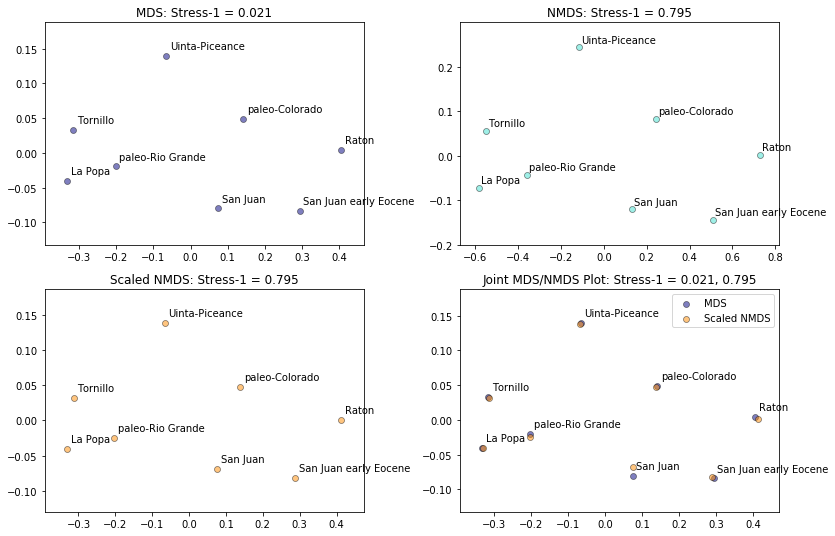

In [342]:
plt.subplot(221)
pairplot = sns.scatterplot(x = pos[:,0],y = pos[:,1],markers='o',color='navy',edgecolor='black',alpha=0.5)
for i, txt in enumerate(df['Label']):
    pairplot.annotate(txt, (pos[i,0]+0.01, pos[i,1]+0.01))
plt.title("MDS: Stress-1 = %0.3f" % Stress)

plt.subplot(222)
pairplot = sns.scatterplot(x = npos[:,0],y = npos[:,1],markers='o',color='turquoise',edgecolor='black',alpha=0.5)
for i, txt in enumerate(df['Label']):
    pairplot.annotate(txt, (npos[i,0]+0.01, npos[i,1]+0.01))
plt.title("NMDS: Stress-1 = %0.3f" % nStress)    

plt.subplot(223)
pairplot = sns.scatterplot(x = snpos[:,0],y = snpos[:,1],markers='o',color='darkorange',edgecolor='black',alpha=0.5)
for i, txt in enumerate(df['Label']):
    pairplot.annotate(txt, (snpos[i,0]+0.01, snpos[i,1]+0.01))
plt.title("Scaled NMDS: Stress-1 = %0.3f" % nStress) 

ax4 = plt.subplot(224)
pairplot = sns.scatterplot(x = pos[:,0],y = pos[:,1],markers='o',color='navy',edgecolor='black',alpha=0.5,label='MDS')
#pairplot = sns.scatterplot(x = npos[:,0],y = npos[:,1],markers='o',color='turquoise',edgecolor='black',alpha=0.5,label='NMDS')
pairplot = sns.scatterplot(x = snpos[:,0],y = snpos[:,1],markers='o',color='darkorange',edgecolor='black',alpha=0.5,label='Scaled NMDS')
for i, txt in enumerate(df['Label']):
    pairplot.annotate(txt, (pos[i,0]+0.01, pos[i,1]+0.01))
#    pairplot.annotate(txt, (npos[i,0], npos[i,1])) 
plt.title("Joint MDS/NMDS Plot: Stress-1 = %0.3f, %0.3f" % (Stress, nStress))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=1.7, wspace=0.3, hspace=0.2)
plt.show()
#plt.savefig('Output/MDS_Plots.pdf', bbox_inches='tight')

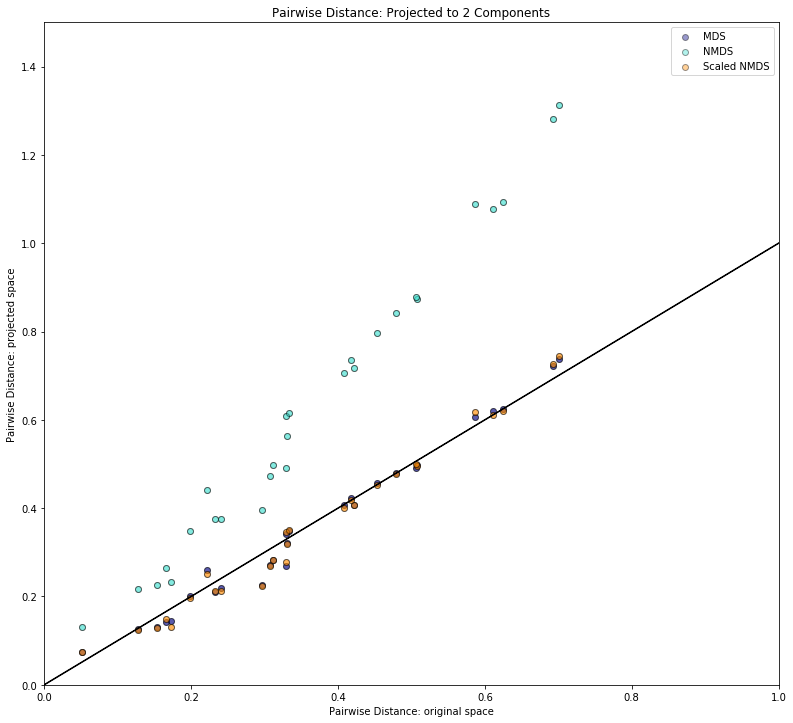

In [336]:
n_components = 2
dists = matrix.to_numpy().ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]
projected_dists = euclidean_distances(pos, squared=False).ravel()[nonzero]
projected_ndists = euclidean_distances(npos, squared=False).ravel()[nonzero]
projected_sndists = euclidean_distances(snpos, squared=False).ravel()[nonzero]

plt.scatter(dists,projected_dists,c='navy',alpha=0.4,edgecolor = 'black',label='MDS')
plt.scatter(dists,projected_ndists,c='turquoise',alpha=0.4,edgecolor='black',label='NMDS')
plt.scatter(dists,projected_sndists,c='darkorange',alpha=0.4,edgecolor='black',label='Scaled NMDS')
plt.arrow(0,0,200,200,width=0.001,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,1); plt.ylim(0,1.5)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()
#plt.savefig('Output/MDS_Model_Checking.pdf', bbox_inches='tight')

(<Figure size 720x720 with 1 Axes>, 0.020562292982476447)

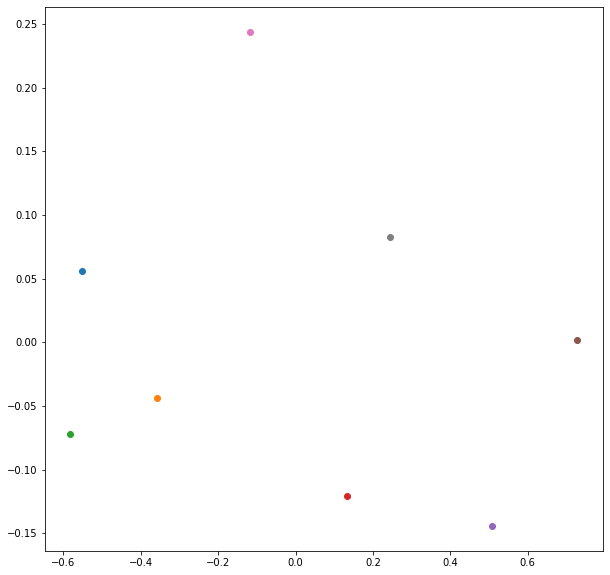

In [129]:
from sklearn import manifold

figMDS, ax = plt.subplots(1, figsize=(10,10))

matrix = df[['Tornillo','paleo-Rio Grande','La Popa','San Juan','San Juan early Eocene','Raton','Uinta-Piceance','paleo-Colorado']]
metric = False

mds = manifold.MDS(random_state=1, dissimilarity='precomputed', n_init=1)
pos = mds.fit(matrix).embedding_
posStress = mds.fit(matrix).stress_     
nmds = manifold.MDS(metric=False, random_state=1, dissimilarity='precomputed', n_init=1)
npos = nmds.fit_transform(matrix, init=pos)
nposStress = mds.fit(matrix).stress_ #possible problem - should this be nmds.fit(matrix).stress_ ?
if metric:
    m = pos
    stress = posStress
else:
    m = npos
    stress = nposStress
        
for i in range(len(npos)):
    ax.plot(m[i][0],m[i][1],'o',)

figMDS, stress